<a href="https://colab.research.google.com/github/troy0323/SchoolSuppliesDetection/blob/main/SchoolSuppliesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jul 13 07:16:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7ZqEyI7sgLSV6JSnfq5e")
project = rf.workspace("professional-elective-3").project("home-appliances-detection")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 230MB/s]
New https://pypi.org/project/ultralytics/8.2.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Home-Appliances-Detection-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1720855014.e06948637f1f.2187.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [8]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Home-Appliances-Detection-1/valid/labels.cache... 101 images, 0 backgrounds, 0 corrupt: 100% 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.04it/s]
                   all        101        344      0.962      0.975      0.969      0.627
              D_eraser        101         35      0.944          1      0.986      0.563
              b_pencil        101         44      0.951      0.909      0.923      0.746
              e_eraser        101         50          1      0.965      0.988      0.478
            g_sharpner        101         24      0.985      0.917      0.953      0.638
              k_pencil        101         55      0.961          1      0.963      0.743
              o_eraser        10

In [9]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/15 /content/Home-Appliances-Detection-1/test/images/IMG_7698_jpg.rf.81e745c2ba961f30cca5c269b4e13d37.jpg: 800x800 1 b_pencil, 2 p_sharpners, 22.5ms
image 2/15 /content/Home-Appliances-Detection-1/test/images/IMG_7759_jpg.rf.f4f8be4384f9dd544579e70f0bcf7db6.jpg: 800x800 1 e_eraser, 1 k_pencil, 22.5ms
image 3/15 /content/Home-Appliances-Detection-1/test/images/IMG_7766_jpg.rf.bf8cff450f57e2456da5595b34882d85.jpg: 800x800 1 k_pencil, 1 y_sharpner, 22.5ms
image 4/15 /content/Home-Appliances-Detection-1/test/images/IMG_7783_jpg.rf.8eb84a176b438f339ff76d23760e711b.jpg: 800x800 1 e_eraser, 1 k_pencil, 1 y_sharpner, 22.5ms
image 5/15 /content/Home-Appliances-Detection-1/test/images/IMG_7825_jpg.rf.23891bc358b20c2425319077e87e51c0.jpg: 800x800 1 k_pencil, 1 y_sharpner, 22.5ms
im

In [10]:
!pip install ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00


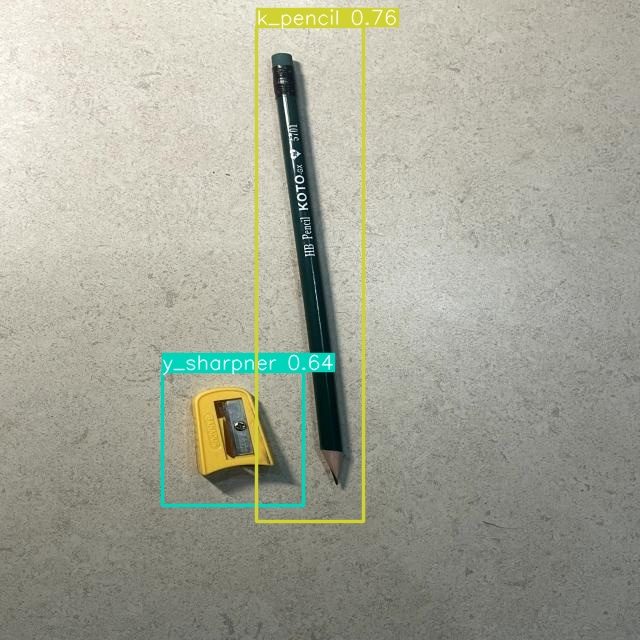

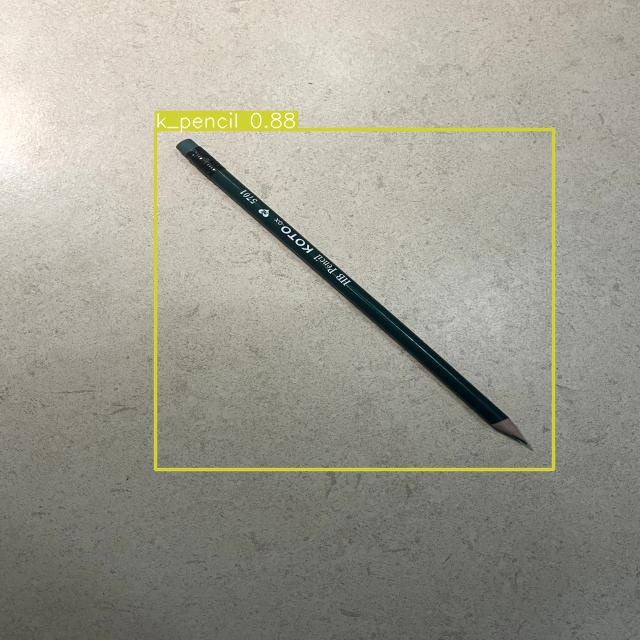

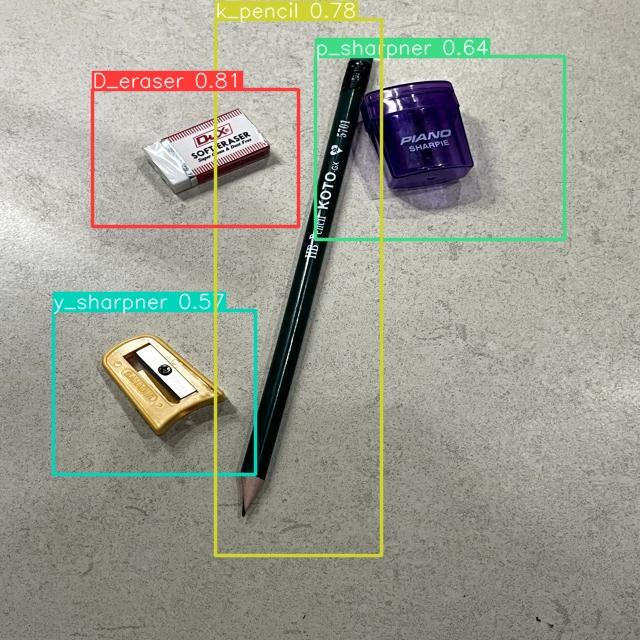

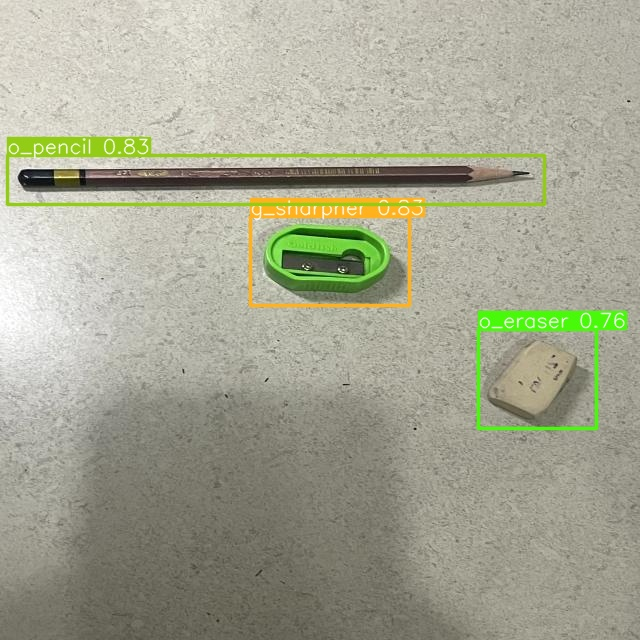

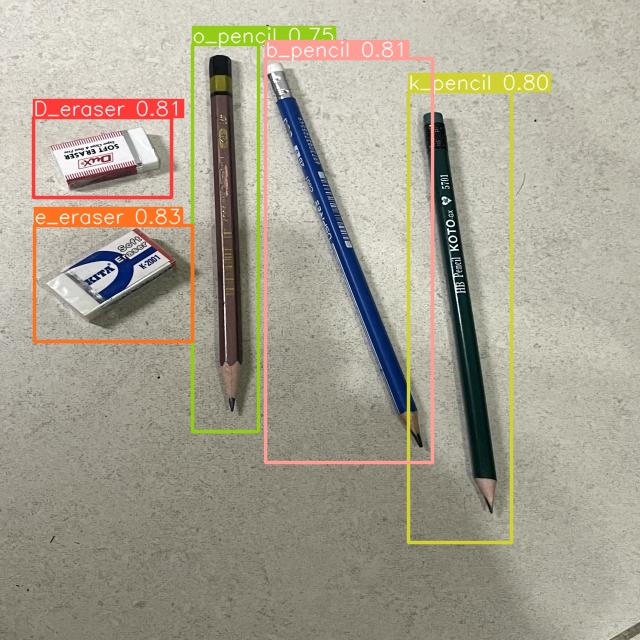

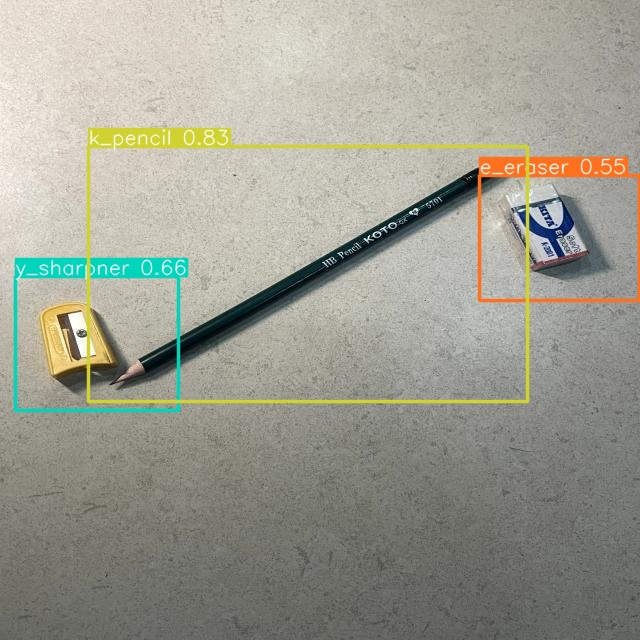

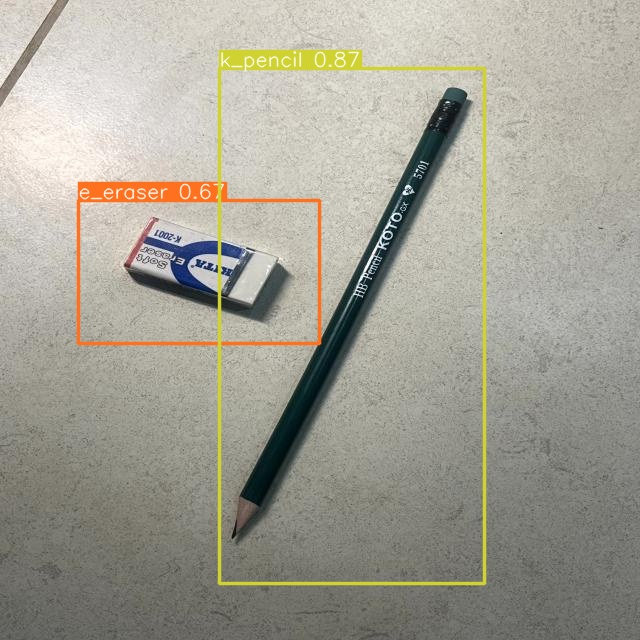

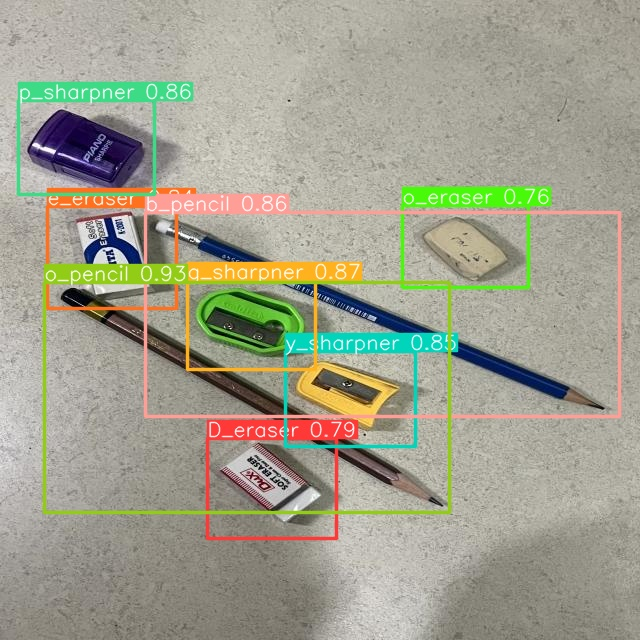

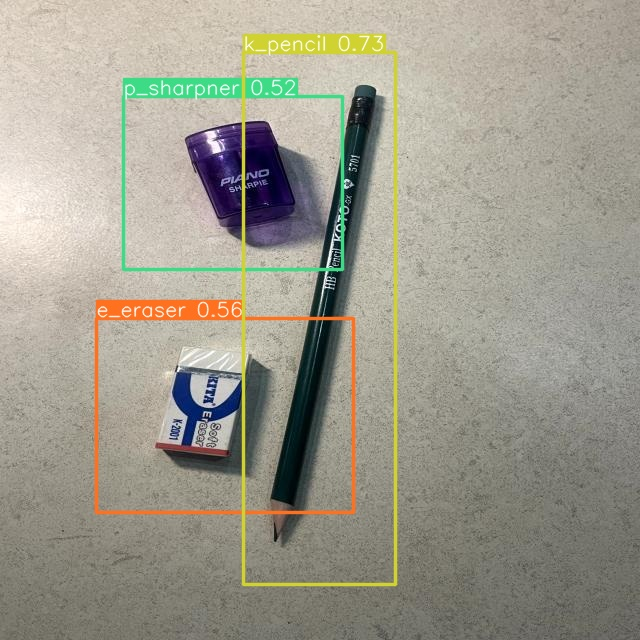

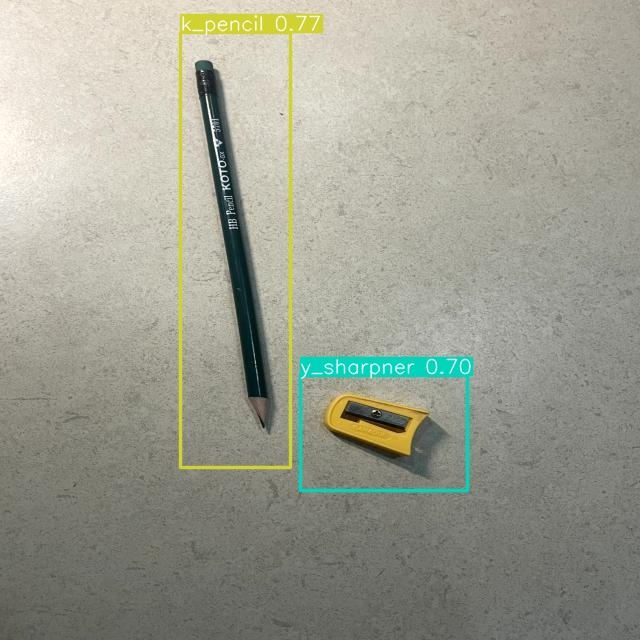

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[5:50]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [13]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/professional-elective-3/home-appliances-detection/1
Share your model with the world at: https://universe.roboflow.com/professional-elective-3/home-appliances-detection/model/1
